In [73]:
import pandas as pd
import numpy as np
file_path='/home/pheme/projects/Iris.csv'
df=pd.read_csv(file_path)

In [74]:
print(df.head(20))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [17]:
print("    Data Types and Non-Null Counts")
df.info()

    Data Types and Non-Null Counts
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


In [16]:
print("   Summary Statistics")
print(df.describe())

   Summary Statistics
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [18]:
print("   Missing Values")
print(df.isnull().sum())

   Missing Values
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [22]:
print("   Unique values")
print(df['Species'].unique())

   Unique values
<StringArray>
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Length: 3, dtype: str


In [20]:
df_clean = df.dropna().copy()

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
le = LabelEncoder()
df_cleaned['Species_encoded'] = le.fit_transform(df_cleaned['Species'])

In [24]:
df_cleaned = df.copy()

In [25]:
df_clean

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:

print(dict(zip(le.classes_, le.transform(le.classes_))))
df_display = df_cleaned[['Species', 'Species_encoded']].iloc[np.r_[16:24, 60:70, 130:140]]
display(df_display)

{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


,Species,Species_encoded
16,Iris-setosa,0
17,Iris-setosa,0
18,Iris-setosa,0
19,Iris-setosa,0
20,Iris-setosa,0
21,Iris-setosa,0
22,Iris-setosa,0
23,Iris-setosa,0
60,Iris-versicolor,1
61,Iris-versicolor,1


In [36]:
X = df_cleaned.drop(['Species', 'Species_encoded'], axis=1) # Features are the measurements
y = df_cleaned['Species_encoded'] # Target is the encoded species


In [37]:
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(X)

In [43]:
print(pd.DataFrame(X_scaled, columns=X.columns).head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977
5      -0.537178      1.957669      -1.170675     -1.050031
6      -1.506521      0.800654      -1.341272     -1.181504
7      -1.021849      0.800654      -1.284407     -1.312977
8      -1.748856     -0.356361      -1.341272     -1.312977
9      -1.143017      0.106445      -1.284407     -1.444450


In [44]:
print(f"Shape of scaled features (X_scaled): {X_scaled.shape}")
print(f"Shape of target variable (y): {y.shape}")

Shape of scaled features (X_scaled): (150, 4)
Shape of target variable (y): (150,)


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [46]:
sns.set_style("whitegrid")

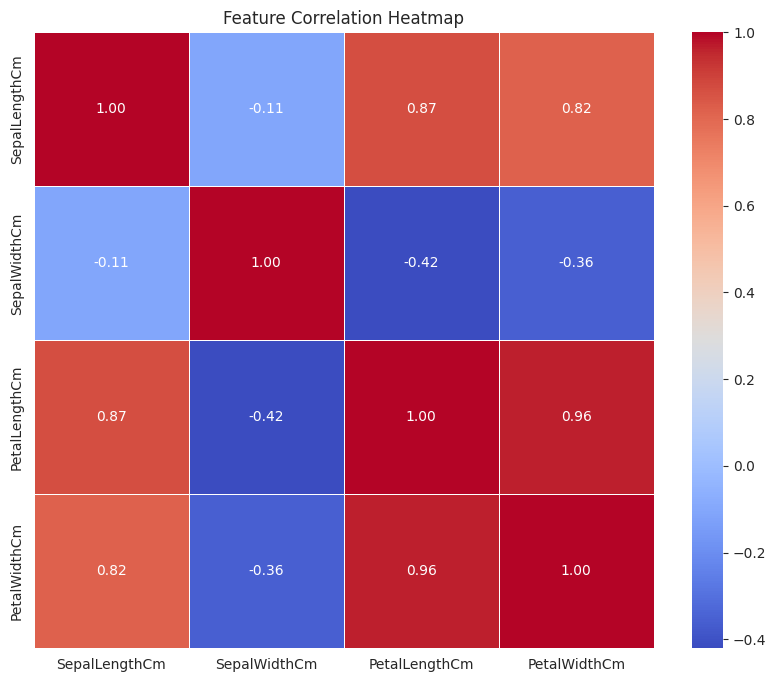

In [49]:
plt.figure(figsize=(10, 8))

numeric_cols = df_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

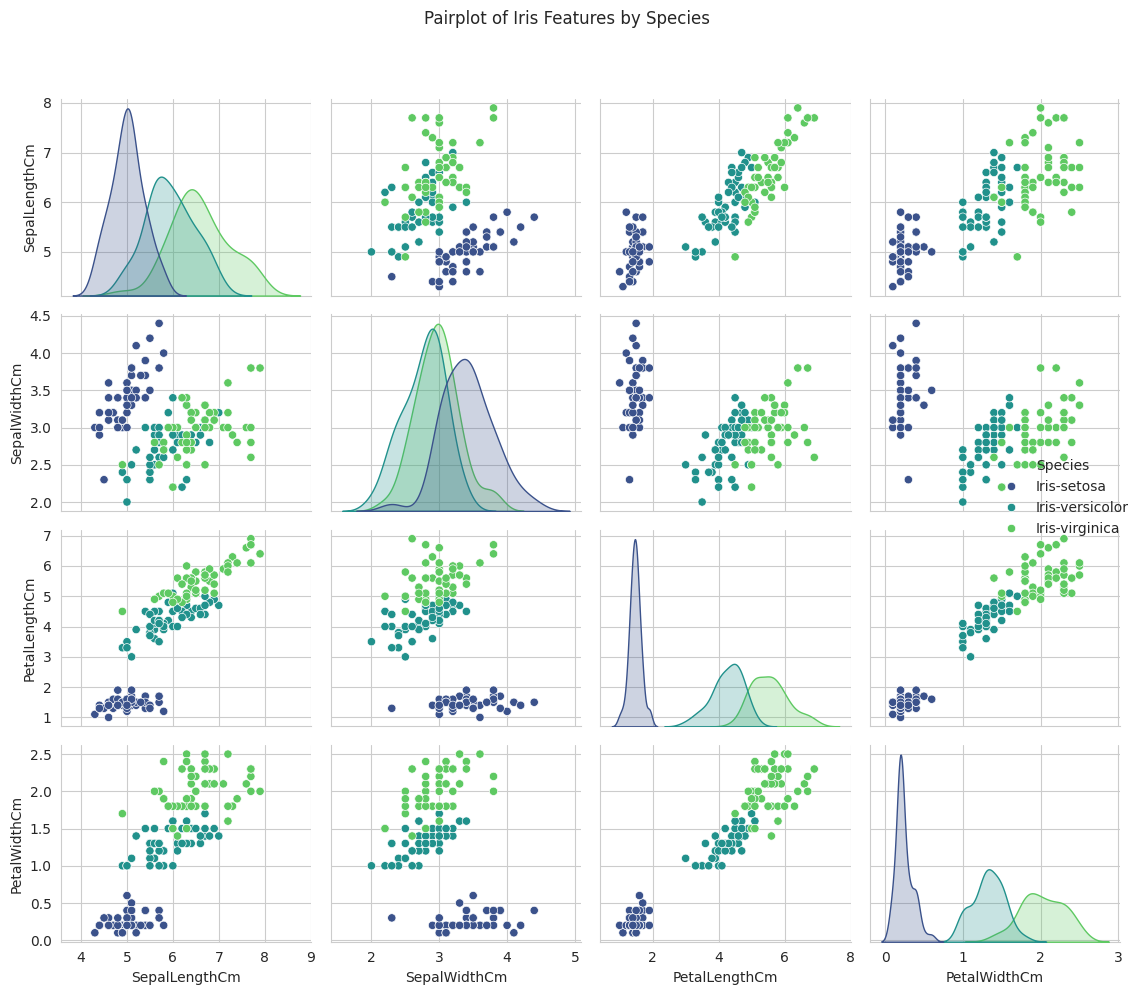

In [54]:
sns.pairplot(df, hue='Species', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

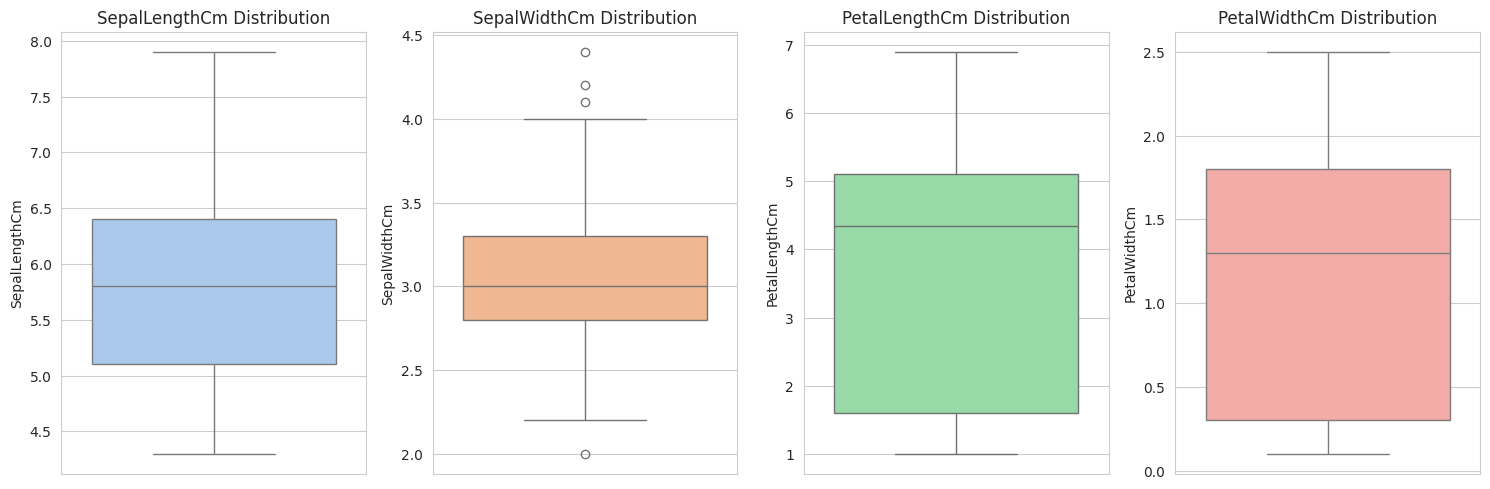

In [72]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=feature, data=df, color=sns.color_palette('pastel')[i])
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()